# Модуль А Анализ и предобработка данных

Наши данные представлены в виде zip архивов с названиями Data1-4. Распакуем эти zip архивы в созданную папку data для удобства использования и структурирования 

In [2]:
import os
import shutil

os.mkdir('./data')

Каждый из архивов наших датасетов содержит папку с названием архива и различное внутреннее содержание:

Папка Data1 содержит директорию Negative в которой представлены некорректные данные, различные надписи не относящиеся к автомобильным номерам, картинки без содержания либо обрезанные номера автомобилей которые не возможно полностью прочитать

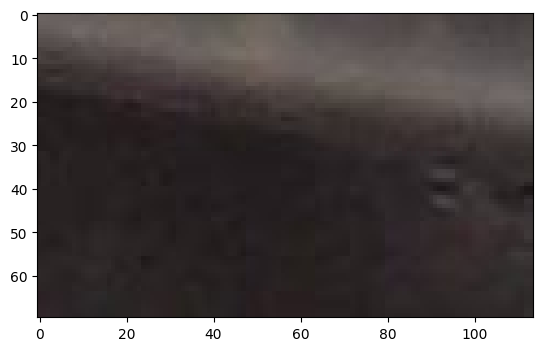

In [11]:
import matplotlib.pyplot as plt
from glob import glob
import random

files = glob('./data/Data1/Data1/Negative/*.jpg')
files

plt.imshow(plt.imread(files[random.randint(0,len(files)-1)]))

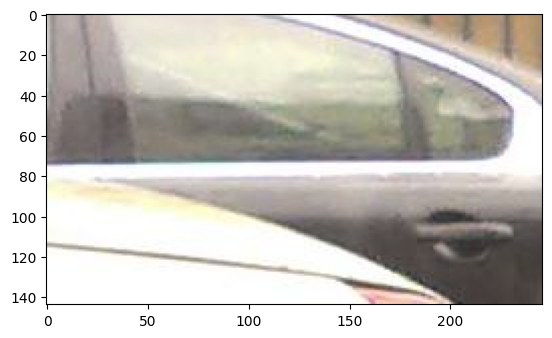

In [12]:
plt.imshow(plt.imread(files[random.randint(0,len(files)-1)]))

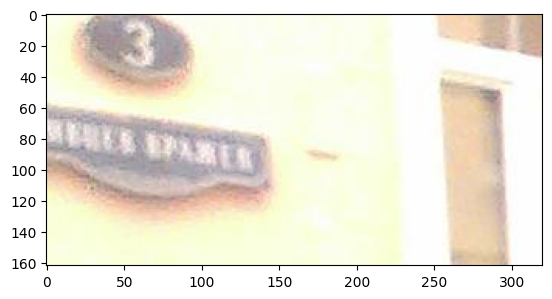

In [13]:
plt.imshow(plt.imread(files[random.randint(0,len(files)-1)]))

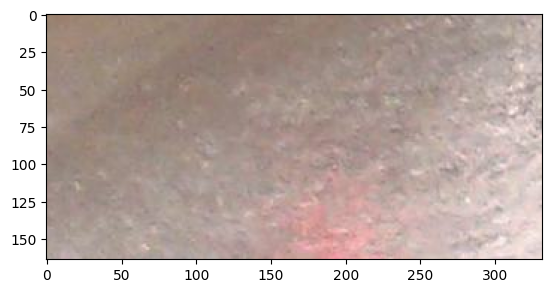

In [14]:
plt.imshow(plt.imread(files[random.randint(0,len(files)-1)]))

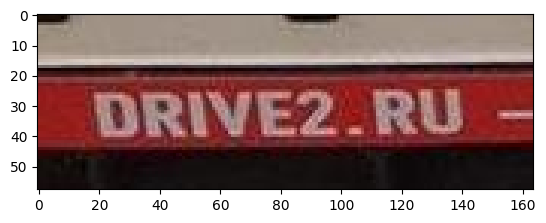

In [18]:
plt.imshow(plt.imread(files[random.randint(0,len(files)-1)]))

Директория Data2 содержит папку NumBase, содержащую картинки с не размеченными номерами автомобилей для чтения этих номеров

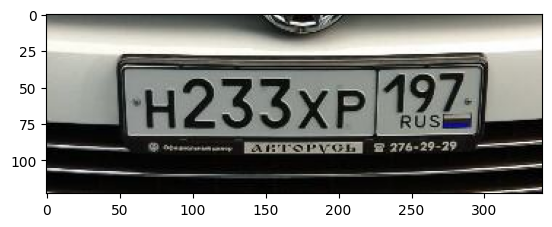

In [20]:
files = glob('./data/Data2/Data2/NumBase/*.jpg')
plt.imshow(plt.imread(files[random.randint(0,len(files)-1)]))

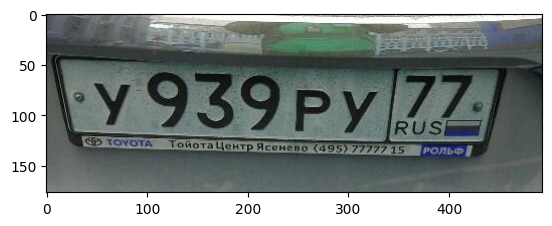

In [21]:
plt.imshow(plt.imread(files[random.randint(0,len(files)-1)]))

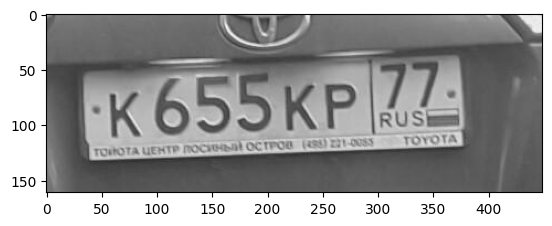

In [22]:
plt.imshow(plt.imread(files[random.randint(0,len(files)-1)]))

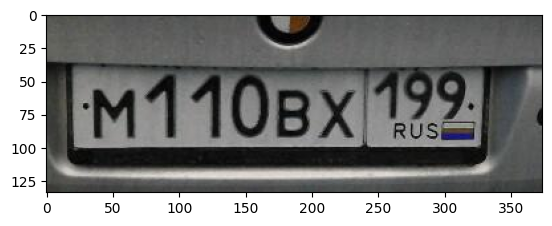

In [23]:
plt.imshow(plt.imread(files[random.randint(0,len(files)-1)]))

Data3 содержит папку Symbols с поддиректориями от 0 до 22 содержащие различные символы похожие или являющиеся символами автомобильных знаков

C:\Users\Participant\AppData\Local\Temp\ipykernel_13696\4055588235.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes = plt.subplots(2,2,figsize=(12,9))


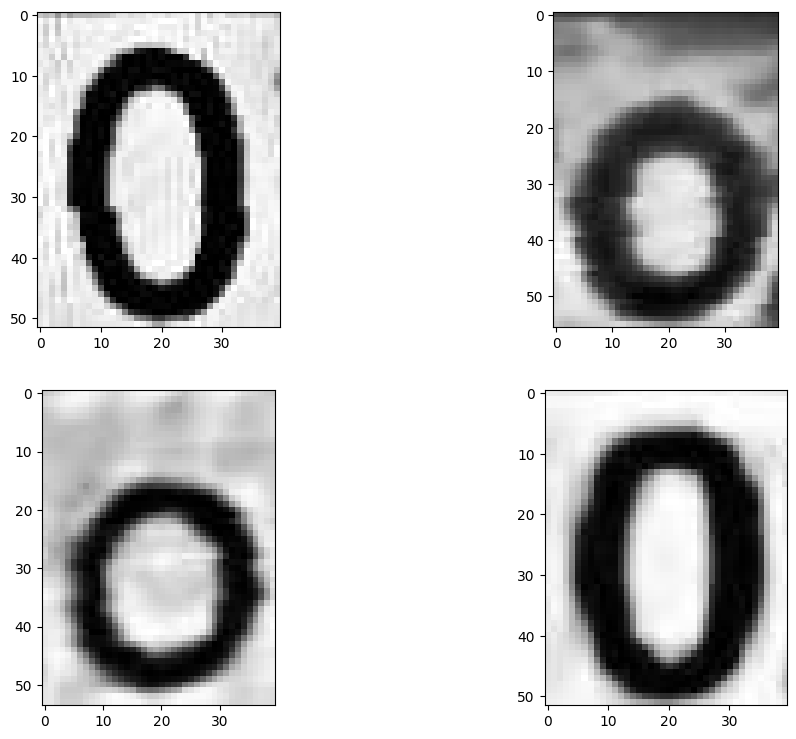

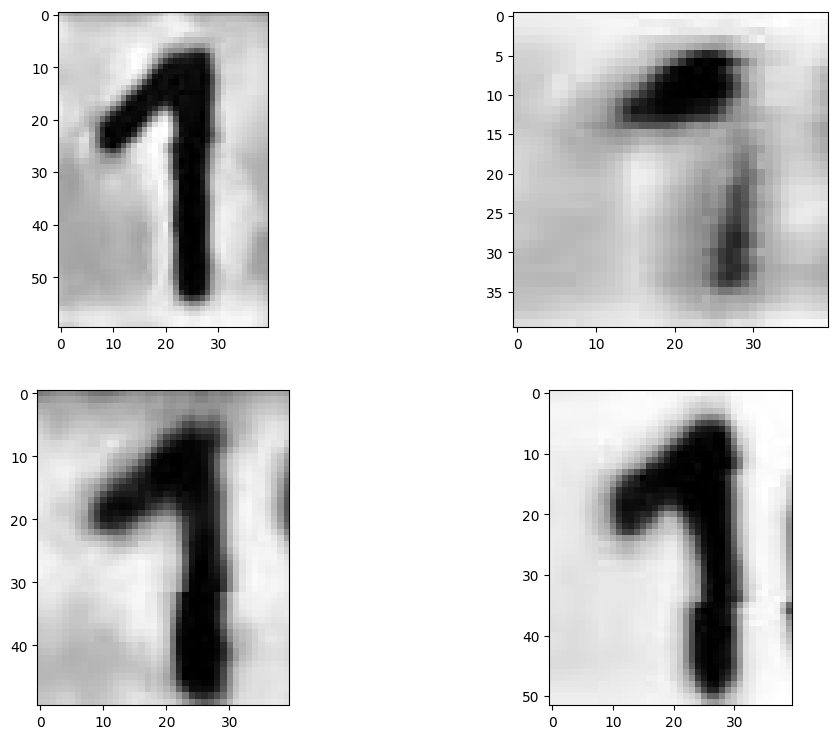

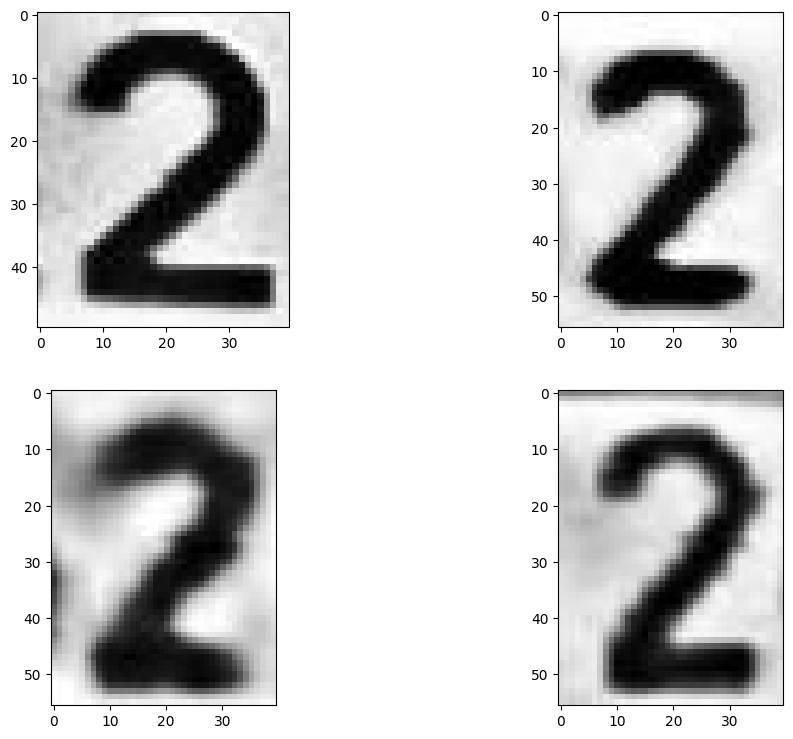

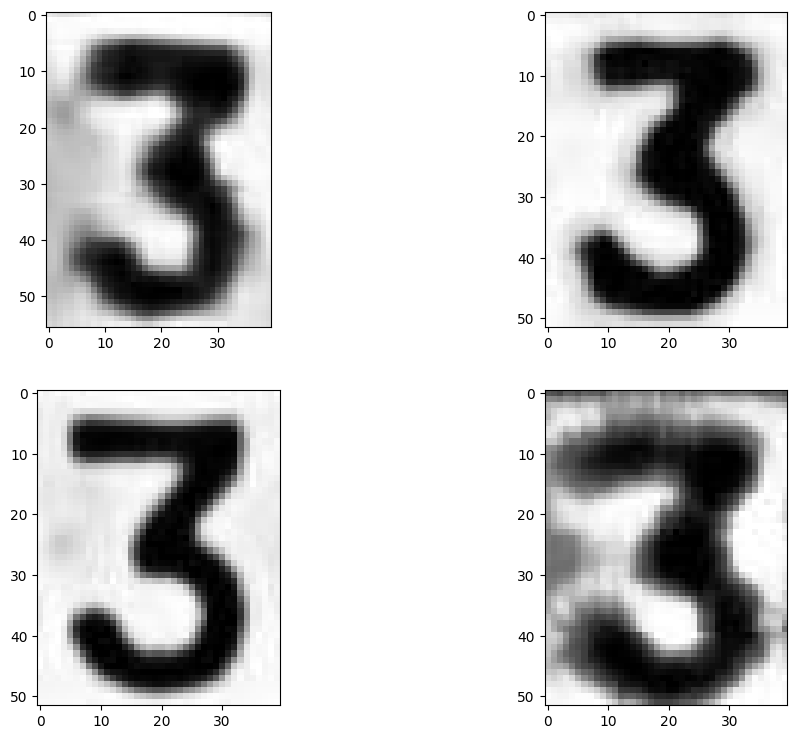

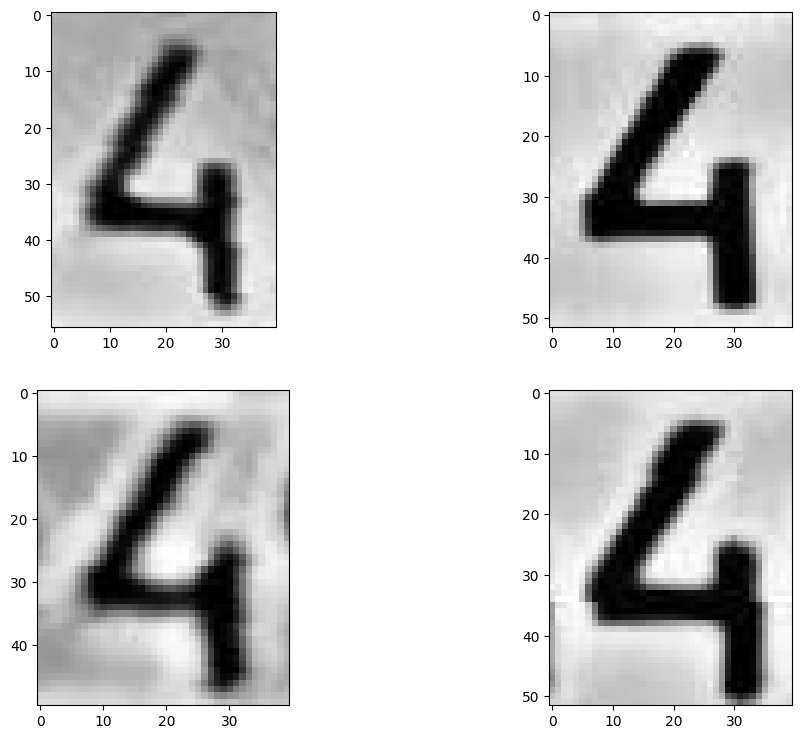

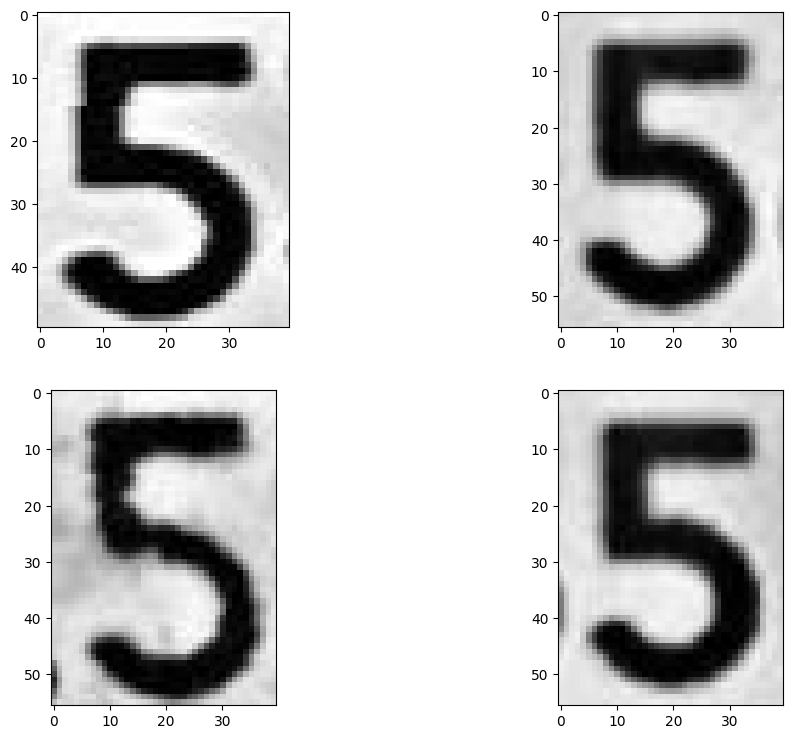

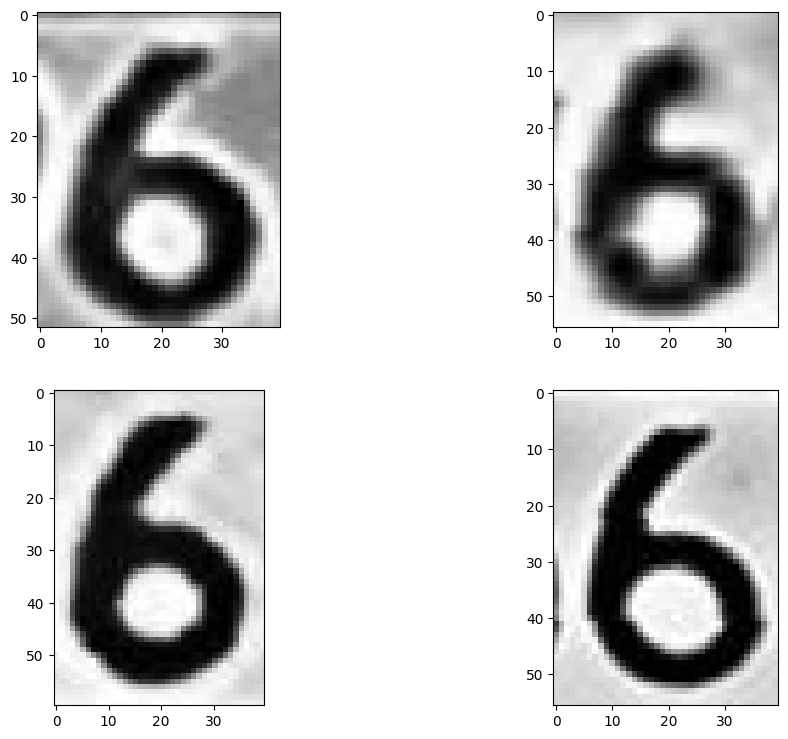

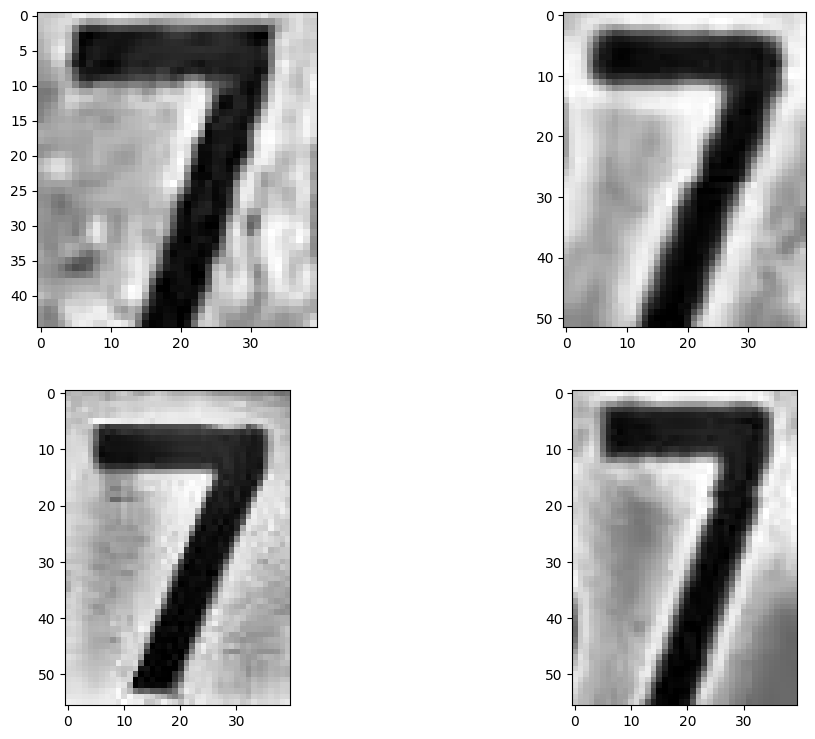

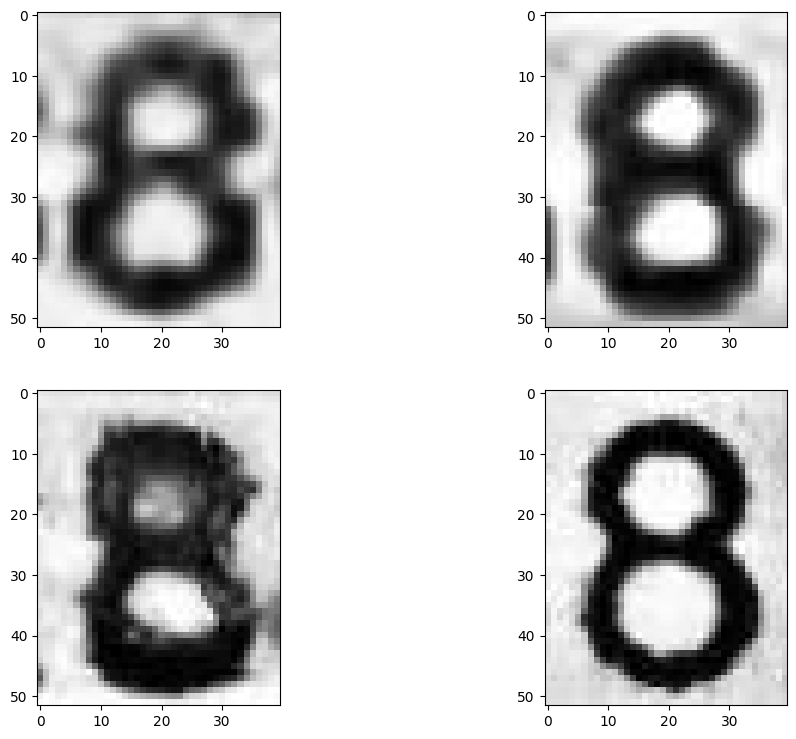

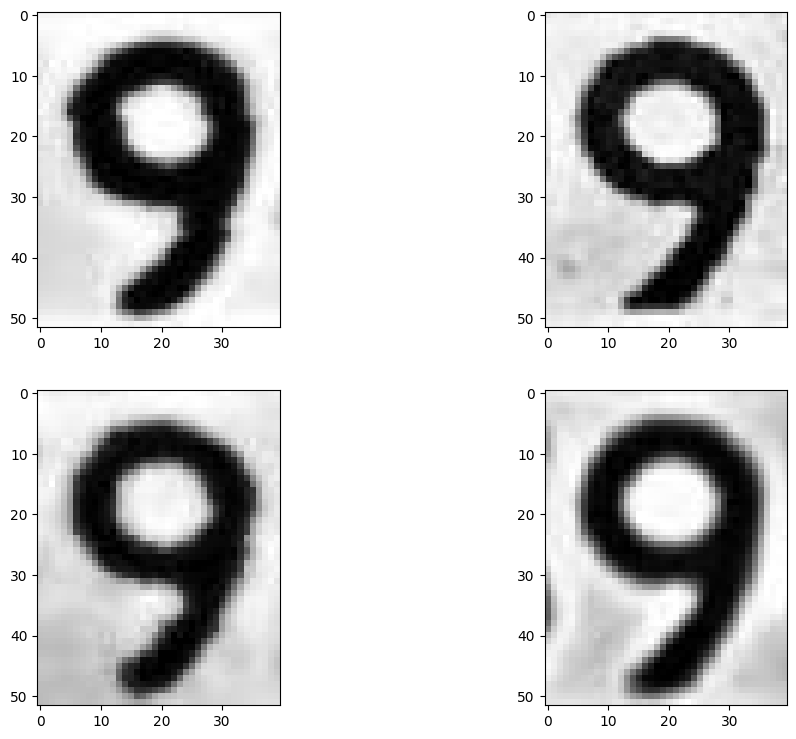

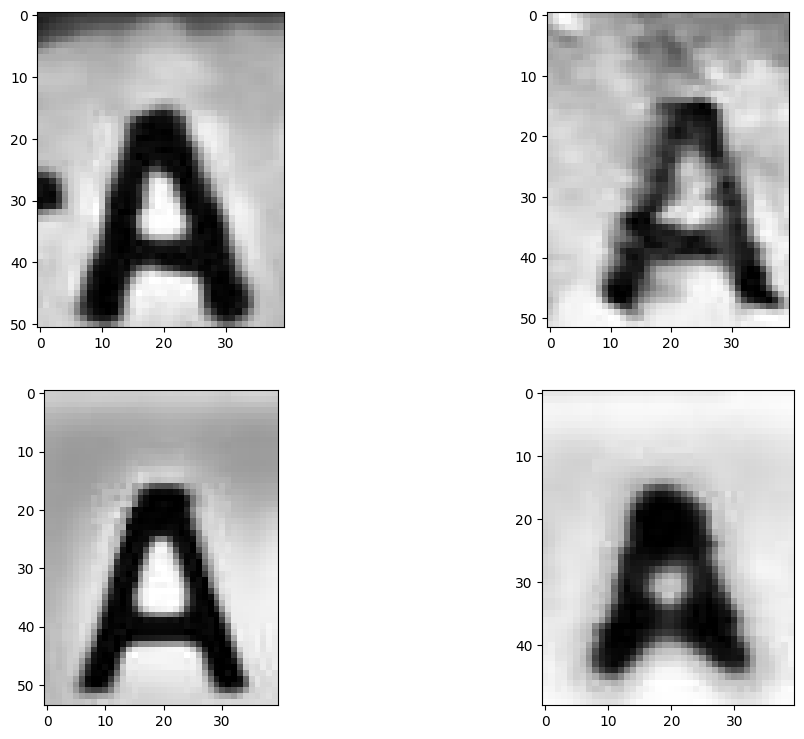

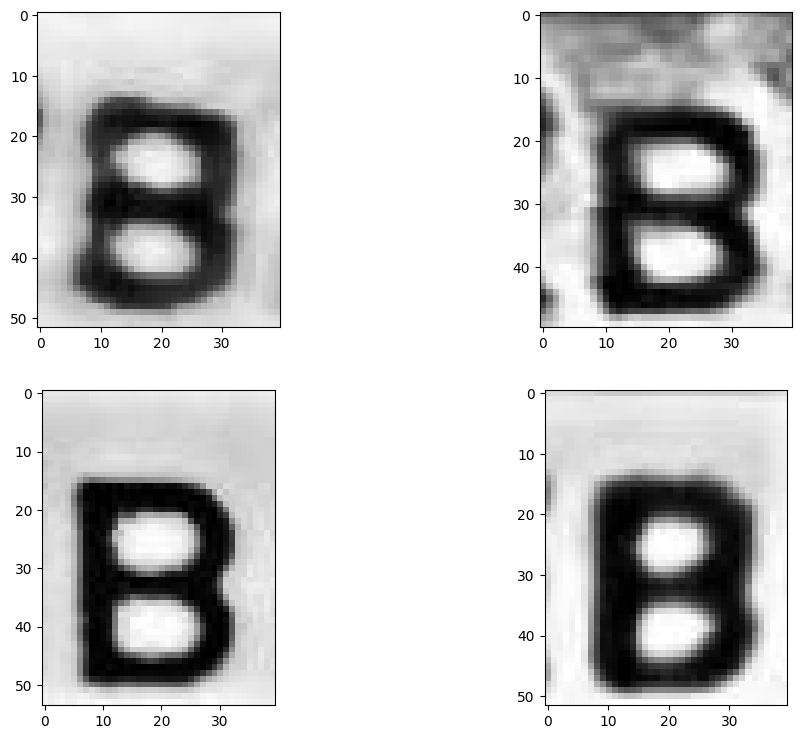

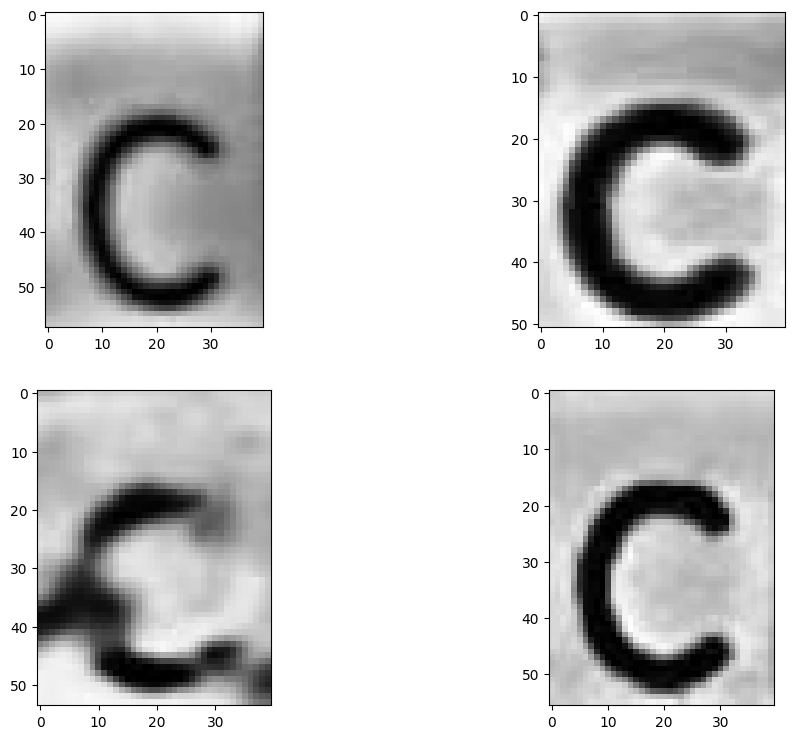

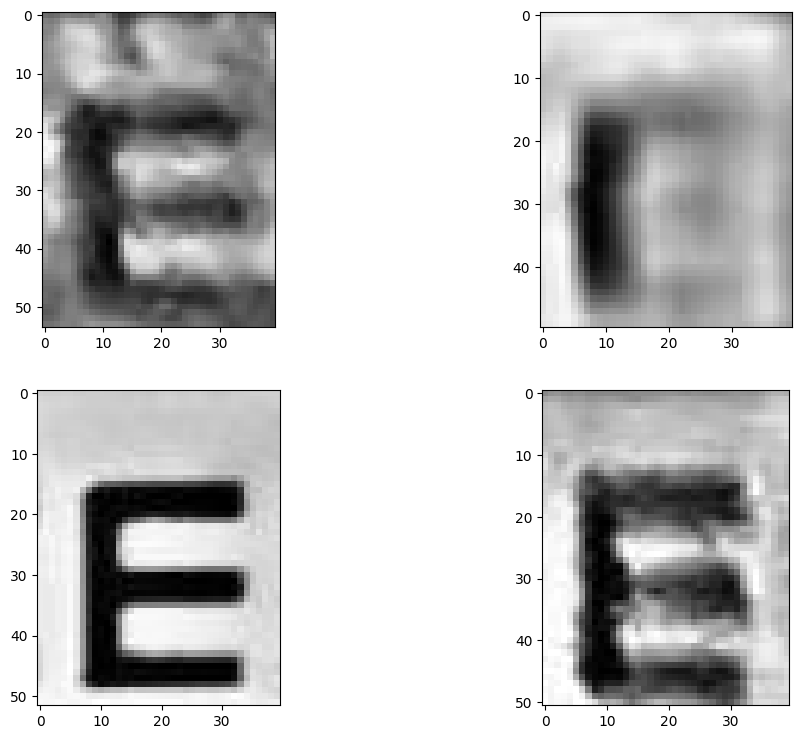

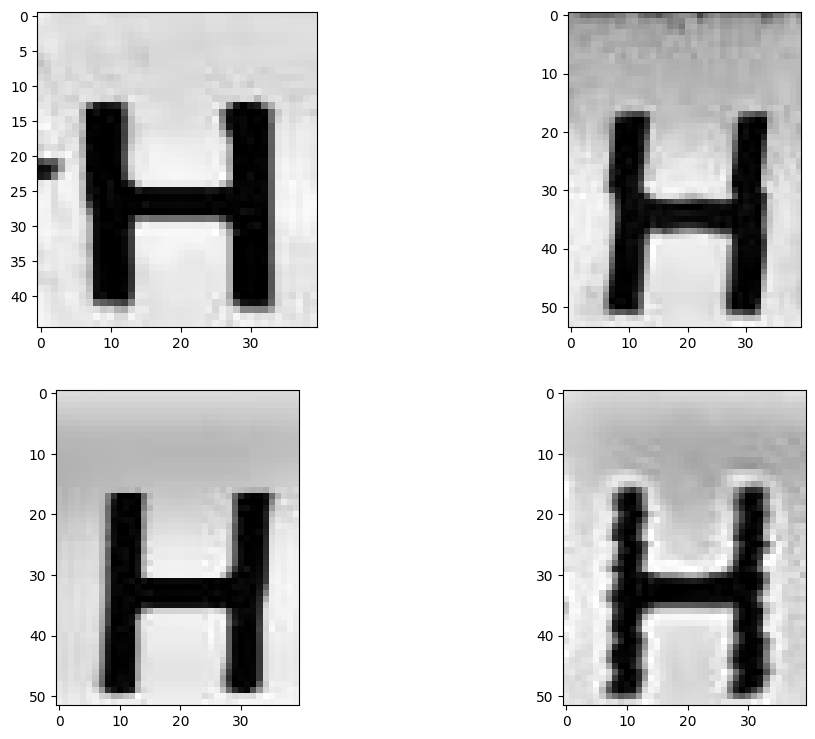

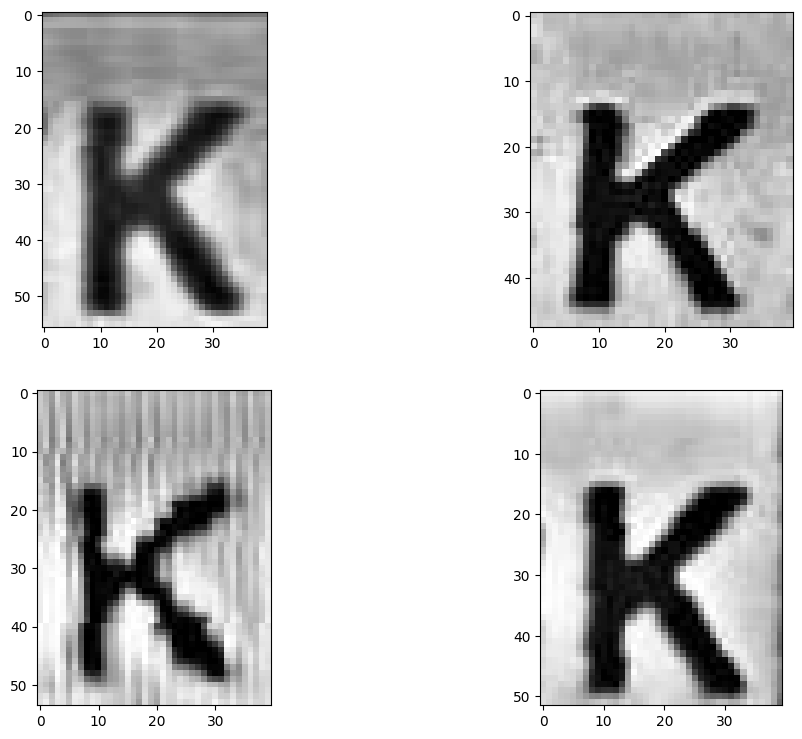

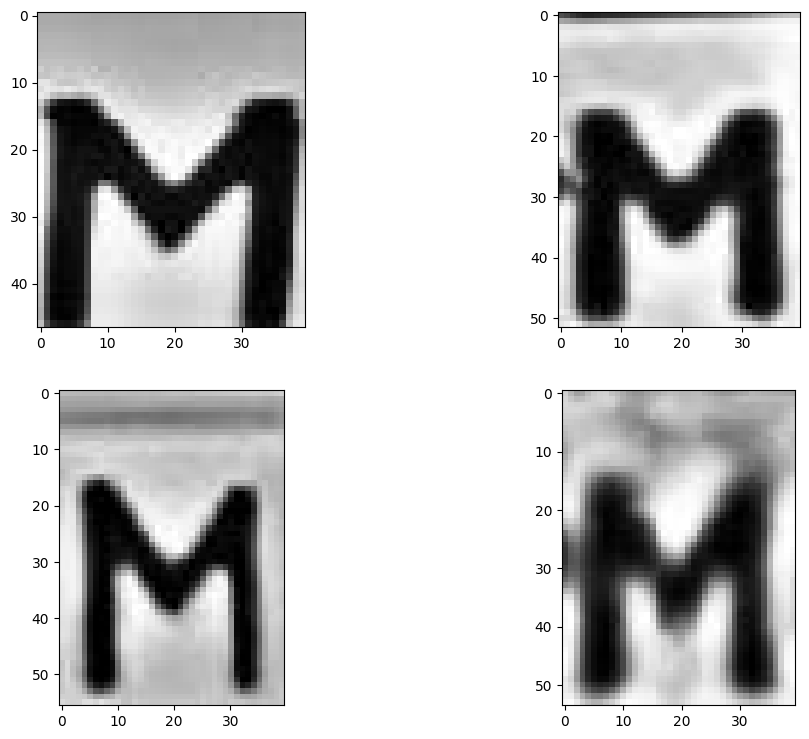

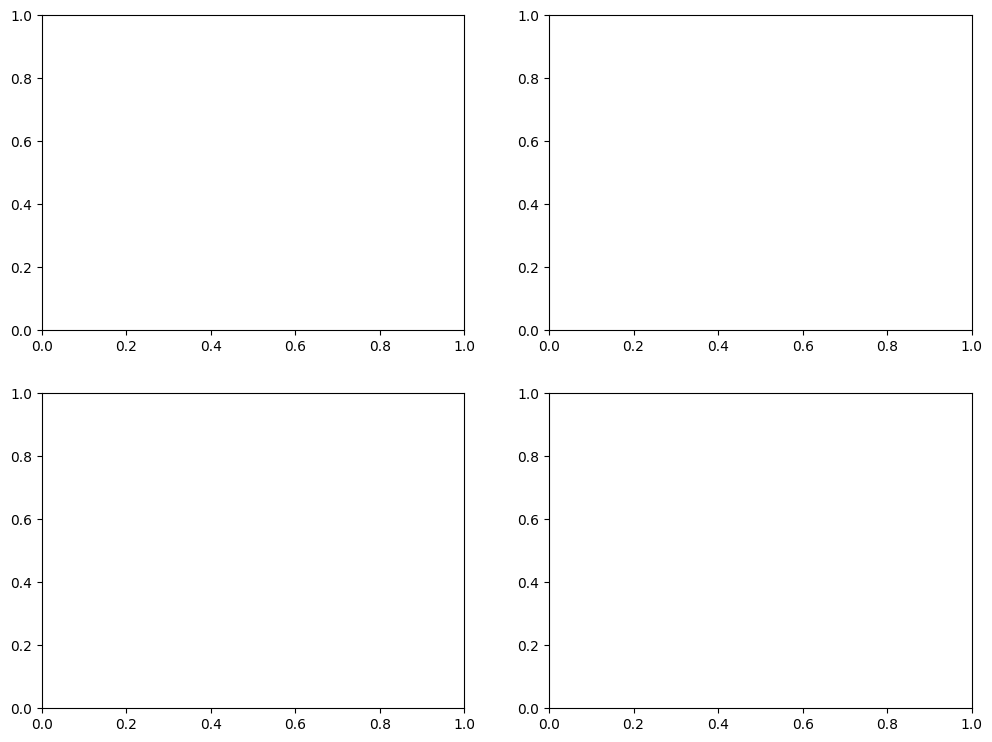

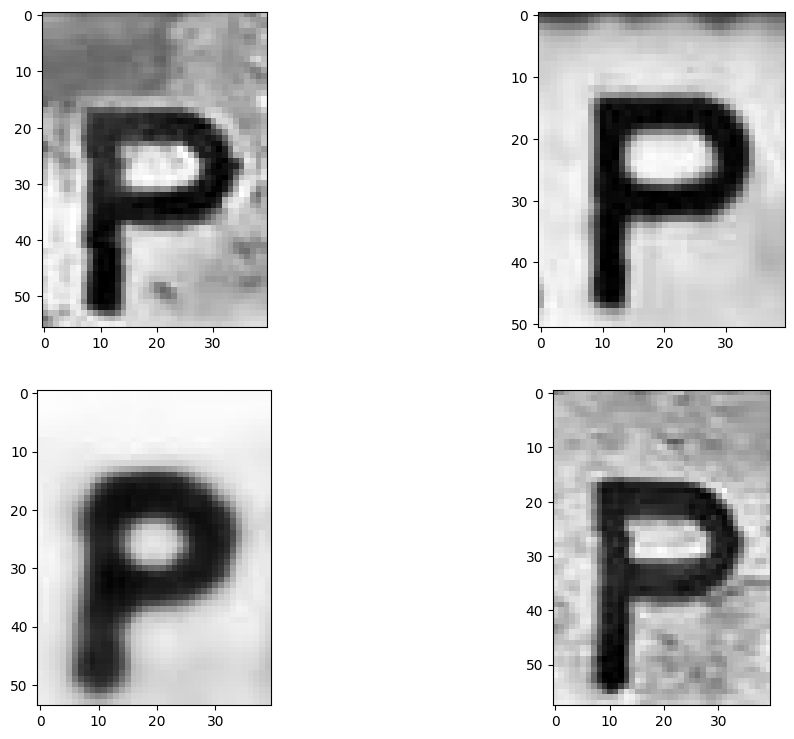

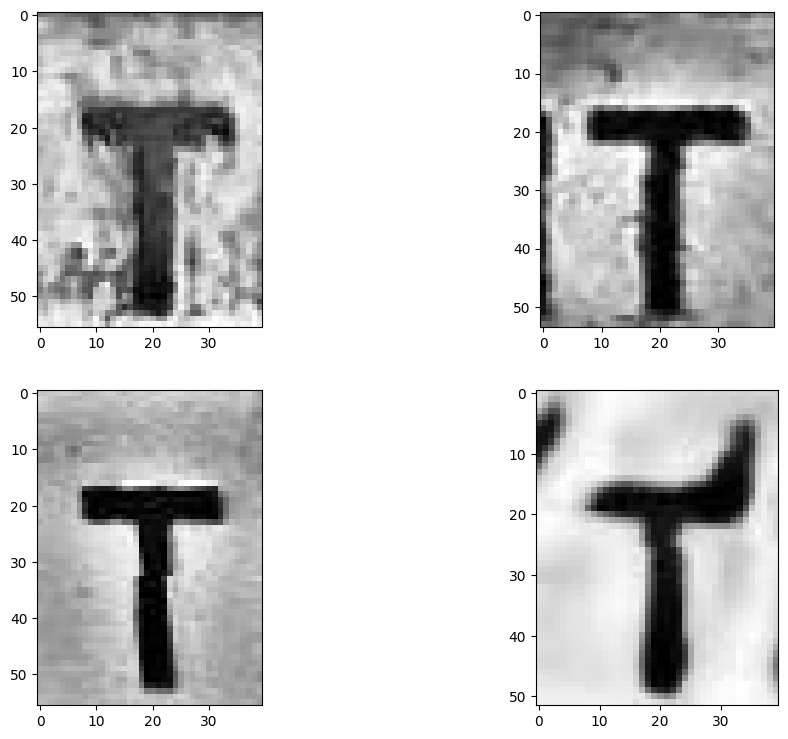

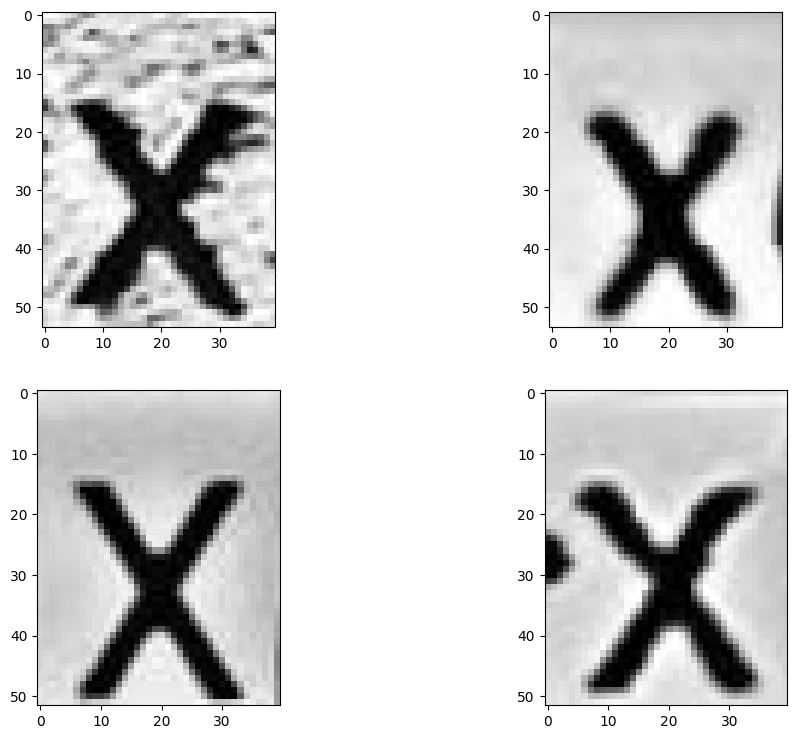

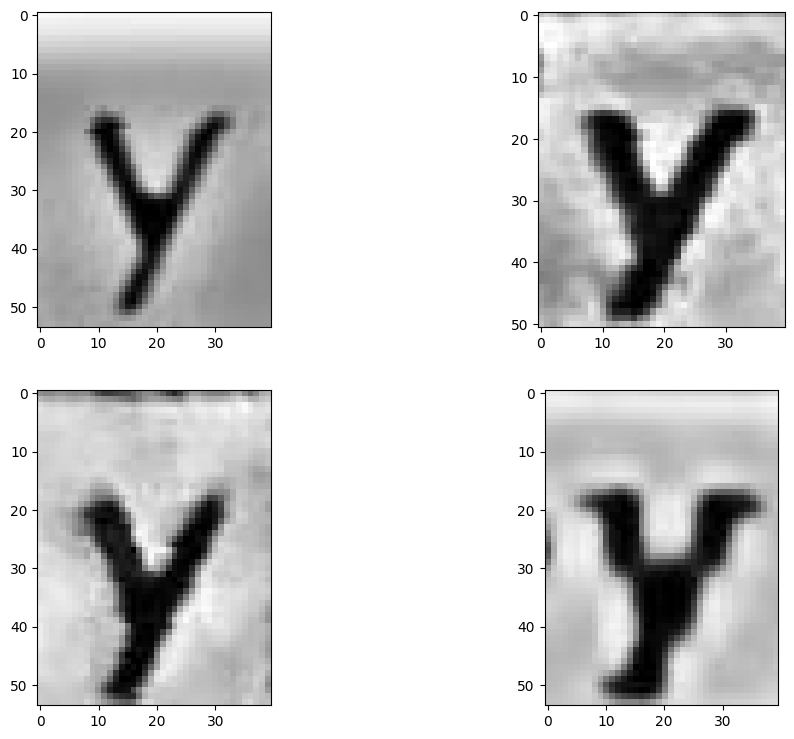

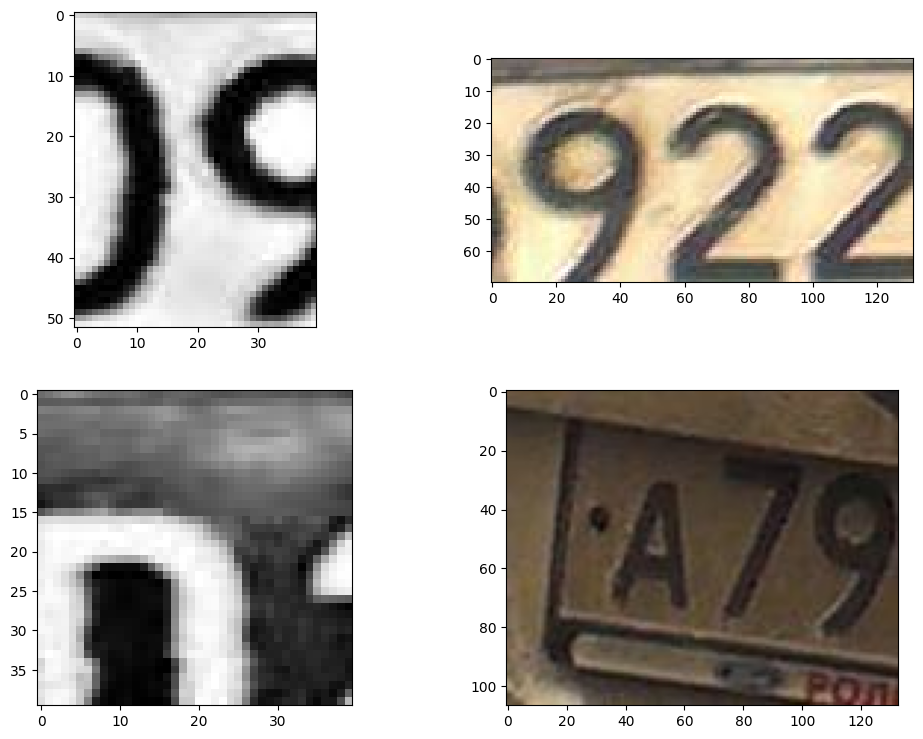

In [108]:
path = './data/Data3/Data3/Symbols/'
for class_num in range(0,23):
    imges = glob(path + str(class_num)+'/*.jpg')
    fig,axes = plt.subplots(2,2,figsize=(12,9))
    try:
        for j,ax in enumerate(axes):
            ax[0].imshow(plt.imread(imges[random.randint(0,len(imges)-1)]))
            ax[1].imshow(plt.imread(imges[random.randint(0,len(imges)-1)]))
    except:
        pass

Класс номер 17 не вывелся, т.к. в нём отсутствуют любые файлы

Data4 же в свою очередь содержит 3 директории 
- classes, содержащая классы нашей разметки, а из задачи следует что у нас 1 класс - Vehicle plate(автомобильный номер).
- full, содержащая все картинки, содержащие номера автомобилей
- fullAnnotations, содержащая разметку формата yolo для наших номеров автомобилей в full

Мы определились со структурой наших данных, теперь следует провести некоторые изменения связанные со структурой исходящие от природы данных.

### Данные папки Data3 Symbols

Эти данные созданы для обучения модели читающей номера посимвольно. Такие данные в отдельной текстовой или другово рода разметке не нуждаются, ведь номер папки является определённым классом данных:

In [25]:
symbols_dict = {}
symbols = [0,1,2,3,4,5,6,7,8,9,'A','B','C','E','H','K','M','?','P','T','X','Y','_']
for i in range(23):
    symbols_dict[str(i)] = symbols[i]
print(symbols_dict)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 'A', '11': 'B', '12': 'C', '13': 'E', '14': 'H', '15': 'K', '16': 'M', '17': '?', '18': 'P', '19': 'T', '20': 'X', '21': 'Y', '22': '_'}


Где номер 17 - неизвестен, так как ни описания ни существующих данных в этой папке нету и номер 22 - битые значения где символ не распознан

В ходе анализа английского алфавита и знаний о номерах автомобилей можем вывести, что символ под номером 17 - это O

In [ ]:
ABCDEFGHIJKLMNOPQRSTUVWXYZ

O - стоит между M и P, как в нашем словаре классов, и т.к. символы официальных автомобильных номеров содержат буквы которые похожи на буквы из английского алфавита можем обозначить что класс 17 - буква O

Для начала вынесем нашу папку в директорию data для удобства

In [28]:
import shutil
shutil.copytree('./data/Data3/Data3/Symbols','./data/symbols')

'./data/symbols'

И заполним папку 17 вручную вырезанными символами из номеров автомобилей папки Data2/NumBase

![](./static/img.png)

Также можно посчитать что буква O на номере эквивалентна нулю, и удалить наш класс 17 сдвинув классы выше немного влево что я сейчас и сделаю т.к. вручную размечать букву O будет очень долго и нецелесообразно

In [76]:
shutil.rmtree('./data/symbols/17')

In [77]:
path = './data/symbols/'
for class_num in range(18,23):
    print(class_num)
    os.rename(src=path+str(class_num),dst=path+str(class_num-1))

18
19
20
21
22


Всё изменили, как видим классы 16 - M 17 - P, а 18 - Т

![](./static/img_5.png)

### Data1 с Negative 

В ходе изучения поняли, что папка содержит данные без номеров. Определённая разметка для таких данных не нужна т.к. мы не видим номеров на них, поэтому для этих данных можно создать пустые txt файлы без разметки, для того чтобы модель понимала что на таких картинках разметки нету.

Создадим txt файлы без содержания

In [78]:
files = glob('./data/Data1/Data1/Negative/*')
print(files)
for file in files:
    with open(file[:-4]+'.txt','w') as file:
        pass

['./data/Data1/Data1/Negative\\0.jpg', './data/Data1/Data1/Negative\\1.jpg', './data/Data1/Data1/Negative\\10.jpg', './data/Data1/Data1/Negative\\100.jpg', './data/Data1/Data1/Negative\\1000.jpg', './data/Data1/Data1/Negative\\1001.jpg', './data/Data1/Data1/Negative\\1002.jpg', './data/Data1/Data1/Negative\\1003.jpg', './data/Data1/Data1/Negative\\1004.jpg', './data/Data1/Data1/Negative\\101.jpg', './data/Data1/Data1/Negative\\102.jpg', './data/Data1/Data1/Negative\\103.jpg', './data/Data1/Data1/Negative\\104.jpg', './data/Data1/Data1/Negative\\105.jpg', './data/Data1/Data1/Negative\\106.jpg', './data/Data1/Data1/Negative\\107.jpg', './data/Data1/Data1/Negative\\108.jpg', './data/Data1/Data1/Negative\\109.jpg', './data/Data1/Data1/Negative\\11.jpg', './data/Data1/Data1/Negative\\110.jpg', './data/Data1/Data1/Negative\\111.jpg', './data/Data1/Data1/Negative\\112.jpg', './data/Data1/Data1/Negative\\113.jpg', './data/Data1/Data1/Negative\\114.jpg', './data/Data1/Data1/Negative\\115.jpg', 

и перенесём все эти данные в папку ./data/licenses, папку для обучения модели разметке авто номеров, чтобы обучить модель, что на картинке может и не быть авто лицензии

In [95]:
shutil.copytree('./data/Data1/Data1/Negative','./data/licenses/negative',dirs_exist_ok=True)

'./data/licenses/negative'

### Data2 

Номера Data2 - уже кропнутые изображения размеченных номеров до этого. В такой ситуации можно доразметить эти данные по символьно и обучить модель которая локализует каждый символ. Но работа по разметке каждого символа кропотливая и требует очень много времени, а времени не так уж и много. В последствии можно сделать выбор в пользу локализации символов не с помощью обученной модели локализации а с помощью встроенных функций библиотеки python-opencv или cv2 

Но для лучшей работы с данными вынесем их в созданную папку ./data/cropped

In [81]:
shutil.copytree('./data/Data2/Data2/NumBase','./data/cropped')

'./data/cropped'

### Data 4

Проверим данные разметки на соотношение к изображениям(их сумму к сумме картинк)

In [35]:
path = './data/Data4/Data4/'
files_img = glob(path+'full/*')
files_txt = glob(path+'fullAnnotations/*')
print(files_img)
print(files_txt)
print('Их количество соответственно: img:',len(files_img),' txts:',len(files_txt))

['./data/Data4/Data4/full\\11_11_2014_10_42_11_230.jpg', './data/Data4/Data4/full\\11_11_2014_10_42_1_183.jpg', './data/Data4/Data4/full\\11_11_2014_10_42_23_871.jpg', './data/Data4/Data4/full\\11_11_2014_10_42_39_449.jpg', './data/Data4/Data4/full\\11_11_2014_11_4_38_543.jpg', './data/Data4/Data4/full\\11_11_2014_11_4_47_840.jpg', './data/Data4/Data4/full\\11_11_2014_11_5_29_996.jpg', './data/Data4/Data4/full\\11_11_2014_11_5_36_386.jpg', './data/Data4/Data4/full\\11_11_2014_11_6_20_621.jpg', './data/Data4/Data4/full\\11_11_2014_11_6_30_590.jpg', './data/Data4/Data4/full\\11_11_2014_11_6_42_965.jpg', './data/Data4/Data4/full\\11_11_2014_11_6_55_840.jpg', './data/Data4/Data4/full\\11_11_2014_11_7_21_324.jpg', './data/Data4/Data4/full\\11_11_2014_11_7_9_277.jpg', './data/Data4/Data4/full\\11_11_2014_11_8_17_886.jpg', './data/Data4/Data4/full\\11_11_2014_17_12_37_449.jpg', './data/Data4/Data4/full\\11_11_2014_17_19_59_355.jpg', './data/Data4/Data4/full\\11_11_2014_17_20_11_121.jpg', './d

можем увидеть что картинок больше чем txt разметок, следовательно либо на некоторых картинках нету автомобильных номеров, либо есть пустые значения в данных, которые нужно заполнить.

Перенесём наши данные в созданную папку licenses

In [36]:
shutil.copytree('./data/Data4/Data4','./data/licenses')

'./data/licenses'

При этом для изучения наших данных перекинем изображения и их разметки в ./data/licenses/all

In [57]:
shutil.copytree('./data/licenses/full','./data/licenses/all')
shutil.copytree('./data/licenses/fullAnnotations','./data/licenses/all',dirs_exist_ok=True)

'./data/licenses/all'

Отметим какие картинки не размечены

In [60]:
path = './data/licenses/all/'
files_img = glob(path+'*.jpg')
files_txt = glob(path+'*.txt')
print(files_img)
print(files_txt)
print('\n'*30)
files_img = set(files_img)
files_txt = set(map(lambda x: x[:-4]+'.jpg', files_txt))
print('IMG',files_img,sep='\n')
print('TXT',files_txt,sep='\n')


['./data/licenses/all\\11_11_2014_10_42_11_230.jpg', './data/licenses/all\\11_11_2014_10_42_1_183.jpg', './data/licenses/all\\11_11_2014_10_42_23_871.jpg', './data/licenses/all\\11_11_2014_10_42_39_449.jpg', './data/licenses/all\\11_11_2014_11_4_38_543.jpg', './data/licenses/all\\11_11_2014_11_4_47_840.jpg', './data/licenses/all\\11_11_2014_11_5_29_996.jpg', './data/licenses/all\\11_11_2014_11_5_36_386.jpg', './data/licenses/all\\11_11_2014_11_6_20_621.jpg', './data/licenses/all\\11_11_2014_11_6_30_590.jpg', './data/licenses/all\\11_11_2014_11_6_42_965.jpg', './data/licenses/all\\11_11_2014_11_6_55_840.jpg', './data/licenses/all\\11_11_2014_11_7_21_324.jpg', './data/licenses/all\\11_11_2014_11_7_9_277.jpg', './data/licenses/all\\11_11_2014_11_8_17_886.jpg', './data/licenses/all\\11_11_2014_17_12_37_449.jpg', './data/licenses/all\\11_11_2014_17_19_59_355.jpg', './data/licenses/all\\11_11_2014_17_20_11_121.jpg', './data/licenses/all\\11_11_2014_17_20_43_855.jpg', './data/licenses/all\\11

Получаем данные у которых есть разметки

In [63]:
print(files_img & files_txt)
print(len(files_img & files_txt))

{'./data/licenses/all\\21_5_2014_20_14_31_868.jpg', './data/licenses/all\\21_5_2014_14_55_24_213.jpg', './data/licenses/all\\21_5_2014_18_14_45_823.jpg', './data/licenses/all\\21_5_2014_17_50_7_730.jpg', './data/licenses/all\\21_5_2014_19_1_25_438.jpg', './data/licenses/all\\21_5_2014_18_21_31_636.jpg', './data/licenses/all\\21_5_2014_20_1_2_936.jpg', './data/licenses/all\\21_5_2014_18_42_28_599.jpg', './data/licenses/all\\21_5_2014_19_47_34_613.jpg', './data/licenses/all\\21_5_2014_21_19_49_458.jpg', './data/licenses/all\\21_5_2014_18_15_1_388.jpg', './data/licenses/all\\21_5_2014_19_49_56_80.jpg', './data/licenses/all\\21_5_2014_18_11_11_418.jpg', './data/licenses/all\\21_5_2014_16_3_22_787.jpg', './data/licenses/all\\21_5_2014_19_34_23_134.jpg', './data/licenses/all\\12_6_2014_20_17_15_328.jpg', './data/licenses/all\\21_5_2014_19_8_55_34.jpg', './data/licenses/all\\21_5_2014_20_29_27_679.jpg', './data/licenses/all\\21_5_2014_17_57_13_690.jpg', './data/licenses/all\\20_5_2014_20_13_4

И удаляем эти данные из списка

In [66]:
files_img.difference_update(files_txt)
no_annot_files = files_img
print(no_annot_files,len(no_annot_files),sep='\n')

{'./data/licenses/all\\29_10_2014_10_31_18_118.jpg', './data/licenses/all\\21_5_2014_23_22_15_849.jpg', './data/licenses/all\\Unknown_225243491.jpg', './data/licenses/all\\22_5_2014_5_50_2_342.jpg', './data/licenses/all\\22_5_2014_6_19_58_885.jpg', './data/licenses/all\\22_5_2014_5_21_7_829.jpg', './data/licenses/all\\22_5_2014_5_27_37_681.jpg', './data/licenses/all\\29_10_2014_10_31_14_696.jpg', './data/licenses/all\\22_5_2014_5_47_55_457.jpg', './data/licenses/all\\21_5_2014_23_29_14_354.jpg', './data/licenses/all\\21_5_2014_23_22_24_899.jpg', './data/licenses/all\\22_5_2014_5_41_56_209.jpg', './data/licenses/all\\Unknown_2119209743.jpg', './data/licenses/all\\21_5_2014_23_6_27_355.jpg', './data/licenses/all\\Unknown_20122321993.jpg', './data/licenses/all\\Unknown_24132856382.jpg', './data/licenses/all\\Unknown_21225851887.jpg', './data/licenses/all\\22_5_2014_13_25_21_885.jpg', './data/licenses/all\\31_10_2014_10_47_59_421.jpg', './data/licenses/all\\22_5_2014_5_31_44_361.jpg', './d

Все эти файлы без разметки, вынесем эти данные в другую папку ./data/licenses/no_annot

In [71]:
os.mkdir('./data/licenses/no_annot/')
for file in no_annot_files:
    shutil.copy(file, dst='./data/licenses/no_annot/')

С помощью YOLO-Annotation-Tool я также посмотрел какая разметка наши авто номеров бывает. И на подобии номеров из Data3/NumBase и размеченных номеров в ./data/licenses я начал разметку данных

![](./static/img_4.png)

![](./static/razmetkas.png)

### Тем же способом, я просмотрел данные на корректность разметки, некоторые картинки либо переразметил либо доразметил

С классами никакой проблемы не возникало, т.к. у нас всего 1 класс на таких картинках

Разметим эти данные с помощью предустановленного git репозитория для разметки данных YOLO-Annotation-Tool

Откроем YOLO-Annotation-Tool

In [73]:
%cd YOLO-Annotation-Tool
!echo %cd%
!Annotate.html
%cd ../

C:\Users\Participant\YOLO-Annotation-Tool
C:\Users\Participant\YOLO-Annotation-Tool
C:\Users\Participant


Загрузим все данные без разметки а из 3376 картинок

![](./static/img_1.png)

Загрузим наши классы

![](./static/img_2.png)

А предразмеченных данных у нас нету поэтому строку bboxes не трогаем

![](./static/img_3.png)

И начинаем размечать наши данные

### Как примерно проходила разметка можно посмотреть в razmetka_play.mkv

Все данные из папки no_annot были размечены в ходе работы и с помощью кнопи save_YOLO я получил zip архив со всеми txt разметками для папки no_annot

![](./static/img_6.png)

![](./static/img_7.png)

Все размеченные данные(txt документы) я для начала распаковал в data/licenses/no_annot

![](./static/img_8.png)

А теперь с помощью кода перенесу все txt разметки в директорию ./data/licenses/all для начала и посмотрим всё ли правильно с разметками.

In [82]:
files = glob('./data/licenses/no_annot/*.txt')
print(files)

['./data/licenses/no_annot\\2013-12-17 13.37.03.txt', './data/licenses/no_annot\\2013-12-17 13.37.37.txt', './data/licenses/no_annot\\2013-12-17 13.37.55.txt', './data/licenses/no_annot\\2013-12-17 13.38.03.txt', './data/licenses/no_annot\\2013-12-17 13.38.24.txt', './data/licenses/no_annot\\2013-12-17 13.38.39.txt', './data/licenses/no_annot\\2013-12-17 13.38.53.txt', './data/licenses/no_annot\\2013-12-17 13.42.22.txt', './data/licenses/no_annot\\2013-12-17 13.42.34.txt', './data/licenses/no_annot\\2013-12-17 13.43.07.txt', './data/licenses/no_annot\\2013-12-17 13.43.49.txt', './data/licenses/no_annot\\2013-12-17 13.43.59.txt', './data/licenses/no_annot\\2013-12-17 13.44.50.txt', './data/licenses/no_annot\\2013-12-17 13.45.04.txt', './data/licenses/no_annot\\2013-12-17 13.45.44.txt', './data/licenses/no_annot\\2013-12-17 13.45.53.txt', './data/licenses/no_annot\\2013-12-17 13.46.03.txt', './data/licenses/no_annot\\2013-12-17 13.46.12.txt', './data/licenses/no_annot\\2013-12-17 13.46.2

In [83]:
for file in files:
    shutil.copy(src=file, dst='./data/licenses/all/'+os.path.basename(file))

In [89]:
path = './data/licenses/all/'
files_img = glob(path+'*.jpg')
files_txt = glob(path+'*.txt')
print(files_img)
print(files_txt)
print('\n'*30)
print('IMG_len: ', len(files_img),'TXT len: ',len(files_txt))

['./data/licenses/all\\11_11_2014_10_42_11_230.jpg', './data/licenses/all\\11_11_2014_10_42_1_183.jpg', './data/licenses/all\\11_11_2014_10_42_23_871.jpg', './data/licenses/all\\11_11_2014_10_42_39_449.jpg', './data/licenses/all\\11_11_2014_11_4_38_543.jpg', './data/licenses/all\\11_11_2014_11_4_47_840.jpg', './data/licenses/all\\11_11_2014_11_5_29_996.jpg', './data/licenses/all\\11_11_2014_11_5_36_386.jpg', './data/licenses/all\\11_11_2014_11_6_20_621.jpg', './data/licenses/all\\11_11_2014_11_6_30_590.jpg', './data/licenses/all\\11_11_2014_11_6_42_965.jpg', './data/licenses/all\\11_11_2014_11_6_55_840.jpg', './data/licenses/all\\11_11_2014_11_7_21_324.jpg', './data/licenses/all\\11_11_2014_11_7_9_277.jpg', './data/licenses/all\\11_11_2014_11_8_17_886.jpg', './data/licenses/all\\11_11_2014_17_12_37_449.jpg', './data/licenses/all\\11_11_2014_17_19_59_355.jpg', './data/licenses/all\\11_11_2014_17_20_11_121.jpg', './data/licenses/all\\11_11_2014_17_20_43_855.jpg', './data/licenses/all\\11

Количество изображений и разметок для них сравнялось, для всех картинок у нас есть разметка если требуется

файлы разметки из all мы разделяем на две папки labels и images т.к. такая структура разделения разметок и изображений используется при обучении модели yolo, и для удобства мы её повторяем

In [93]:
os.mkdir('./data/licenses/labels')
os.mkdir('./data/licenses/images')
files_img = glob('./data/licenses/all/*.jpg')
files_txt = glob('./data/licenses/all/*.txt')
for img in files_img:
    shutil.copy(img, dst='./data/licenses/images/'+os.path.basename(img))
for txt in files_txt:
    shutil.copy(txt, dst='./data/licenses/labels/'+os.path.basename(txt))

Теперь файлы из папки ./data/licenses/negative распределяем по папкам images и labels ведь они тоже нужны для обучения нашей модели

In [96]:
files_img = glob('./data/licenses/negative/*.jpg')
files_txt = glob('./data/licenses/negative/*.txt')
for img in files_img:
    shutil.move(img, dst='./data/licenses/images/'+os.path.basename(img))
for txt in files_txt:
    shutil.move(txt, dst='./data/licenses/labels/'+os.path.basename(txt))

Данные для обучения нашей модели yolo готовы

Теперь данные которые понадобятся в следующем модуле перенесём в отдельные директории и сохраним наши результаты на рабочем столе

In [99]:
shutil.copytree('./data/cropped','./Result_A/cropped')

'./Result_A/cropped'

In [100]:
shutil.copytree('./data/symbols','./Result_A/symbols')

'./Result_A/symbols'

А из обработанной папки licenses нам нужны лишь images и labels, т.к. он состоит из всех остальных папок в licenses 

In [101]:
shutil.copytree('./data/licenses/labels','./Result_A/licenses/labels')
shutil.copytree('./data/licenses/images','./Result_A/licenses/images')

'./Result_A/licenses/images'

В итоге получаем папку Result_A со следующим содержанием:
- cropped
    - *.jpg(обрезанные изображения номеров авто)
- symbols
    - 0
        - *.jpg
    - 1
        - *.jpg
    - 2
        - *.jpg
И так далее
    - 21
        - *.jpg(содержат одиночные цифры и буквы закодированные названием папок)
- licenses
    - images
        - *.jpg(изображения для детекции автомобильных номеров)
    - labels
        - *.txt(разметка в формате yolo для этих изображений)

Картинки чёрно-белые т.к. работаю в чёрной теме Pycharm, я чесно чесно не виноват :(

# ______________________________________________________________________________

Не могу не упомянуть файл .\data\Data4\Data4\full\29_5_2014_4_36_10_707.jpg который содержался в данных

In [ ]:
🤨🤨🤨🤨🤔🤔😥😥🤯🤯🤯